In [1]:
%matplotlib inline


# Normal, Ledoit-Wolf and OAS Linear Discriminant Analysis for classification

This example illustrates how the Ledoit-Wolf and Oracle Shrinkage
Approximating (OAS) estimators of covariance can improve classification.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import OAS

In [2]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

In [3]:
def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

In [4]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto").fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=None).fit(X, y)
        oa = OAS(store_precision=False, assume_centered=False)
        clf3 = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa).fit(
            X, y
        )

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

In [5]:
features_samples_ratio = np.array(n_features_range) / n_train

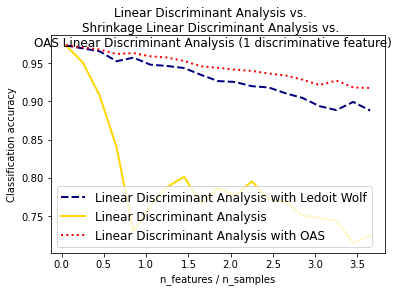

In [6]:
plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="Linear Discriminant Analysis with Ledoit Wolf",
    color="navy",
    linestyle="dashed",
)
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="Linear Discriminant Analysis",
    color="gold",
    linestyle="solid",
)
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="Linear Discriminant Analysis with OAS",
    color="red",
    linestyle="dotted",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc=3, prop={"size": 12})
plt.suptitle(
    "Linear Discriminant Analysis vs. "
    + "\n"
    + "Shrinkage Linear Discriminant Analysis vs. "
    + "\n"
    + "OAS Linear Discriminant Analysis (1 discriminative feature)"
)
plt.show()

## Silva - rRNA

In [6]:
from bioinformatics import na_read
from bioinformatics import KmerVectors as kvec
from bioinformatics import NCBIDataset as nds
from bioinformatics import FASTADataset as fads

In [7]:
SILVA_PATH="../data/bioinformatics/silva/20220823/fasta/"

archaea_file = SILVA_PATH + "archaea_arb-silva.de_2022-08-23_id1197800_tax_silva.fasta"
bacteria_file = SILVA_PATH + "bacteria_bacteroidotaarb-silva.de_2022-08-23_id1197801_tax_silva.fasta"
eukaryota_file = SILVA_PATH + "eukaryota_amorphea_arb-silva.de_2022-08-23_id1197812_tax_silva.fasta"

In [8]:
archaea_fads = fads.FASTADataset('archaea', archaea_file, limit=0)
print(f'archaea: [{len(archaea_fads.fasta_dataset)}]')
#archaea.fasta_dataset
bacteria_fads = fads.FASTADataset('bacteria', bacteria_file, limit=0)
print(f'bacteria: [{len(bacteria_fads.fasta_dataset)}]')

archaea: [347020]
bacteria: [1078234]


In [9]:
kv = kvec.KmerVectors(['A','G','C','U'], 8, fastadatasets=[archaea_fads, bacteria_fads])
print(kv.labels)

KmerVectors Object -
alphabet [['A', 'G', 'C', 'U']]
dict: [['AAAAAAAA', 'AAAAAAAG', 'AAAAAAAC', 'AAAAAAAU']]...[['UUUUUUUA', 'UUUUUUUG', 'UUUUUUUC', 'UUUUUUUU']]
Labels: [{'archaea': 1, 'bacteria': 2}]
[archaea]
[../data/bioinformatics/silva/20220823/fasta/archaea_arb-silva.de_2022-08-23_id1197800_tax_silva.fasta]
[bacteria]
[../data/bioinformatics/silva/20220823/fasta/bacteria_bacteroidotaarb-silva.de_2022-08-23_id1197801_tax_silva.fasta]
{'archaea': 1, 'bacteria': 2}


In [10]:
e = kv.seq2KmerEncodedNumpyVectors(base_count_max=4, length_min=500, dataset_limit=10000)

FASTA Dataset
fasta dataset: [archaea], limit: [10000]
10002000300040005000600070008000900010000capped at [10000]
-
Total:             [10909]
Using :               [10001]
skip_count_minlength: [358]
skip_count_alphabet:  [551]
fasta dataset: [bacteria], limit: [10000]
1000200030004000500060007000800090001000011000capped at [10000]
-
Total:             [11421]
Using :               [10001]
skip_count_minlength: [607]
skip_count_alphabet:  [814]


In [11]:
X_all=e[0]
X_all

array([[23958, 30297, 55655, ..., 29819, 53743, 18364],
       [27141, 43028, 41043, ..., 34629,  7445, 29780],
       [49879,  2911, 11645, ..., 43726, 43833, 44263],
       ...,
       [ 4605, 18420,  8147, ..., 58800, 38594, 23307],
       [ 4605, 18420,  8147, ..., 25494, 36443, 14700],
       [ 4605, 18420,  8147, ...,  1321,  5285, 21142]])

In [12]:
y_all=e[1]
y_all

array([1, 1, 1, ..., 2, 2, 2])

In [21]:
#n=6
#X_all[:, 0:n]
print(len(X_all[:, 0:6]))

20000


In [18]:
n=6
y_all[0:n]

array([1, 1, 1, 1, 1, 1])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42)

In [14]:
print(f'X_train len: [{len(X_train)}]')
print(f'y_train len: [{len(y_train)}]')

print(f'X_test len: [{len(X_test)}]')
print(f'y_test len: [{len(y_test)}]')



X_train len: [13400]
y_train len: [13400]
X_test len: [6600]
y_test len: [6600]


In [21]:
n_train = 13400  # samples for training
n_test = 6600  # samples for testing
n_averages = 1  # how often to repeat classification
n_features_max = 500  # maximum number of features
step = 10  # step size for the calculation

In [19]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
i = 0
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        print(f'[{i}]', end = "")
        i += 1
        X = X_train[:, 0:n_features]
        y = y_train

        clf1 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto").fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=None).fit(X, y)
        oa = OAS(store_precision=False, assume_centered=False)
        clf3 = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa).fit(X, y)

        X = X_test[:, 0:n_features]
        y = y_test
        #X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

[0][1][2][3][4][5][6][7][8][9][10][11][12][13][14][15][16][17][18][19][20][21][22][23][24][25][26][27][28][29][30][31][32][33][34][35][36][37][38][39][40][41][42][43][44][45][46][47][48][49]

In [22]:
features_samples_ratio = np.array(n_features_range) / n_train

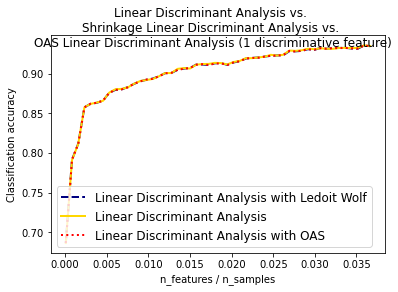

In [23]:
plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="Linear Discriminant Analysis with Ledoit Wolf",
    color="navy",
    linestyle="dashed",
)
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="Linear Discriminant Analysis",
    color="gold",
    linestyle="solid",
)
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="Linear Discriminant Analysis with OAS",
    color="red",
    linestyle="dotted",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc=3, prop={"size": 12})
plt.suptitle(
    "Linear Discriminant Analysis vs. "
    + "\n"
    + "Shrinkage Linear Discriminant Analysis vs. "
    + "\n"
    + "OAS Linear Discriminant Analysis (1 discriminative feature)"
)
plt.show()